In [3]:
import time
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from IPython.display import clear_output

In [1]:
# Probability Function
def probability(bin_x, bin_y, state_x, state_y, throw_deg):


    #First throw exception rule if person is directly on top of bin:
    if((state_x==bin_x) & (state_y==bin_y)):
        probability = 1
    else:
        
        
        # To accomodate for going over the 0 degree line
        if((throw_deg>270) & (state_x<=bin_x) & (state_y<=bin_y)):
            throw_deg = throw_deg - 360
        elif((throw_deg<90) & (state_x>bin_x) & (state_y<bin_y)):
            throw_deg = 360 + throw_deg
        else:
            throw_deg = throw_deg
            
        # Calculate Euclidean distance
        distance = ((bin_x - state_x)**2 + (bin_y - state_y)**2)**0.5

        # max distance for bin will always be on of the 4 corner points:
        corner_x = [-10,-10,10,10]
        corner_y = [-10,10,-10,10]
        dist_table = pd.DataFrame()
        for corner in range(0,4):
            dist = pd.DataFrame({'distance':((bin_x - corner_x[corner])**2 + (bin_y - corner_y[corner])**2)**0.5}, index = [corner])
            dist_table = dist_table.append(dist)
        dist_table = dist_table.reset_index()
        dist_table = dist_table.sort_values('distance', ascending = False)
        max_dist = dist_table['distance'][0]
        
        distance_score = 1 - (distance/max_dist)


        # First if person is directly horizontal or vertical of bin:
        if((state_x==bin_x) & (state_y>bin_y)):
            direction = 180
        elif((state_x==bin_x) & (state_y<bin_y)):
             direction = 0
        
        elif((state_x>bin_x) & (state_y==bin_y)):
             direction = 270
        elif((state_x<bin_x) & (state_y==bin_y)):
             direction = 90
              
        # If person is north-east of bin:
        elif((state_x>bin_x) & (state_y>bin_y)):
            opp = abs(bin_x - state_x)
            adj = abs(bin_y - state_y)
            direction = 180 +  np.degrees(np.arctan(opp/adj))

        # If person is south-east of bin:
        elif((state_x>bin_x) & (state_y<bin_y)):
            opp = abs(bin_y - state_y)
            adj = abs(bin_x - state_x)
            direction = 270 +  np.degrees(np.arctan(opp/adj))

        # If person is south-west of bin:
        elif((state_x<bin_x) & (state_y<bin_y)):
            opp = abs(bin_x - state_x)
            adj = abs(bin_y - state_y)
            direction =  np.degrees(np.arctan(opp/adj))

        # If person is north-west of bin:
        elif((state_x<bin_x) & (state_y>bin_y)):
            opp = abs(bin_y - state_y)
            adj = abs(bin_x - state_x)
            direction = 90 +  np.degrees(np.arctan(opp/adj))

        direction_score = (45-abs(direction - throw_deg))/45
      
        probability = distance_score*direction_score
        if(probability>0):
            probability = probability
        else:
            probability = 0
        
    return(probability)

In [4]:
#Define Q(s,a) table by all possible states and THROW actions initialised to 0
Q_table = pd.DataFrame()
for z in range(0,360):
    throw_direction = int(z)
    for i in range(0,21):
        state_x = int(-10 + i)
        for j in range(0,21):
            state_y = int(-10 + j)
            reward = 0
            Q = pd.DataFrame({'throw_dir':throw_direction,'move_dir':"none",'state_x':state_x,'state_y':state_y,'Q':0, 'reward': reward}, index = [0])
            Q_table = Q_table.append(Q)
Q_table = Q_table.reset_index(drop=True)
print("Q table 1 initialised")

#Define Q(s,a) table by all possible states and MOVE actions initialised to 0

for x in range(0,21):
    state_x = int(-10 + x)
    for y in range(0,21):
        state_y = int(-10 + y)
        for m in range(0,8):
            move_dir = int(m)
            
            # skip impossible moves starting with 4 corners then edges
            if((state_x==10)&(state_y==10)&(move_dir==0)):
                continue
            elif((state_x==10)&(state_y==10)&(move_dir==2)):
                continue
                
            elif((state_x==10)&(state_y==-10)&(move_dir==2)):
                continue
            elif((state_x==10)&(state_y==-10)&(move_dir==4)):
                continue
                
            elif((state_x==-10)&(state_y==-10)&(move_dir==4)):
                continue
            elif((state_x==-10)&(state_y==-10)&(move_dir==6)):
                continue
                
            elif((state_x==-10)&(state_y==10)&(move_dir==6)):
                continue
            elif((state_x==-10)&(state_y==10)&(move_dir==0)):
                continue
                
            elif((state_x==10) & (move_dir == 1)):
                continue
            elif((state_x==10) & (move_dir == 2)):
                continue
            elif((state_x==10) & (move_dir == 3)):
                continue
                 
            elif((state_x==-10) & (move_dir == 5)):
                continue
            elif((state_x==-10) & (move_dir == 6)):
                continue
            elif((state_x==-10) & (move_dir == 7)):
                continue
                 
            elif((state_y==10) & (move_dir == 1)):
                continue
            elif((state_y==10) & (move_dir == 0)):
                continue
            elif((state_y==10) & (move_dir == 7)):
                continue
                 
            elif((state_y==-10) & (move_dir == 3)):
                continue
            elif((state_y==-10) & (move_dir == 4)):
                continue
            elif((state_y==-10) & (move_dir == 5)):
                continue
                 
            else:
                reward = 0
                Q = pd.DataFrame({'throw_dir':"none",'move_dir':move_dir,'state_x':state_x,'state_y':state_y,'Q':0, 'reward': reward}, index = [0])
                Q_table = Q_table.append(Q)
Q_table = Q_table.reset_index(drop=True)
print("Q table 2 initialised")
Q_table.tail()

Q table 1 initialised
Q table 2 initialised


,throw_dir,move_dir,state_x,state_y,Q,reward
162035,none,6,10,9,0,0
162036,none,7,10,9,0,0
162037,none,4,10,10,0,0
162038,none,5,10,10,0,0
162039,none,6,10,10,0,0


In [5]:
# Initialise V values for all state-action pairs
Q_table['V'] = 0

In [6]:
# Initialise V values for all state-action pairs
Q_table['V'] = 0
# Calculate Probability of each State-Action pair, 1 for movement else use probability function
bin_x = 0
bin_y = 0

prob_list = pd.DataFrame()
for n,action in enumerate(Q_table['throw_dir']):
    # Guarantee 100% probability if movement
    if(action == "none"):
        prob = 1
    # Calculate if thrown
    else:
        prob = probability(bin_x, bin_y, Q_table['state_x'][n], Q_table['state_y'][n], action)
    prob_list = prob_list.append(pd.DataFrame({'prob':prob}, index = [n] ))
prob_list = prob_list.reset_index(drop=True)
Q_table['prob'] = prob_list['prob']

In [7]:
# Define start position
start_x = -5
start_y = -5

In [8]:
# Subset the Q table for just this start state and randomly select an action
Q_table[ (Q_table['state_x']==start_x) &  (Q_table['state_y']==start_y) & (Q_table['move_dir']!="none") ].sample()

,throw_dir,move_dir,state_x,state_y,Q,reward,V,prob
159552,none,6,-5,-5,0,0,0,1.0


In [9]:
a_1 = Q_table[ (Q_table['state_x']==start_x) &  (Q_table['state_y']==start_y) & (Q_table['move_dir']!="none") ].sample()


move_direction = a_1['move_dir'].iloc[0]
#Map this to actual direction and find V(s) for next state
if(move_direction == 0):
    move_x = 0
    move_y = 1
elif(move_direction == 1):
    move_x = 1
    move_y = 1
elif(move_direction == 2):
    move_x = 1
    move_y = 0
elif(move_direction == 3):
    move_x = 1
    move_y = -1
elif(move_direction == 4):
    move_x = 0
    move_y = -1
elif(move_direction == 5):
    move_x = -1
    move_y = -1
elif(move_direction == 6):
    move_x = -1
    move_y = 0
elif(move_direction == 7):
    move_x = -1
    move_y = 1

new_x = a_1['state_x'].iloc[0]+move_x
new_y = a_1['state_y'].iloc[0]+move_y
    
a_2 = Q_table[ (Q_table['state_x']==new_x) &  (Q_table['state_y']==new_y) & (Q_table['move_dir']!="none") ].sample()
a_2

,throw_dir,move_dir,state_x,state_y,Q,reward,V,prob
159393,none,1,-6,-4,0,0,0,1.0


In [10]:
# Define start position
start_x = -5
start_y = -5
action_cap = 100

action_table = pd.DataFrame()
for a in range(0,action_cap):
    
    # Introduce 50/50 chance for move or throw action
    rng = np.random.rand()
    if rng<=0.5:
        action_class = "throw"
    else:
        action_class = "move"
    
    # THROW ACTION
    if action_class == "throw":
        # If first action, use start state
        if a==0:
            action = Q_table[(Q_table['state_x']==start_x) &  (Q_table['state_y']==start_y) & (Q_table['throw_dir']!="none")].sample()
        # Else new x and y are from previous itneration's output
        else:
            new_x = action['state_x'].iloc[0]
            new_y = action['state_y'].iloc[0]
            action = Q_table[(Q_table['state_x']==new_x) &  (Q_table['state_y']==new_y) & (Q_table['throw_dir']!="none")].sample()
    
    # ELSE MOVE ACTION
    else:
        # If first action, use start state
        if a==0:
            action = Q_table[(Q_table['state_x']==start_x) &  (Q_table['state_y']==start_y) & (Q_table['throw_dir']=="none")].sample()
        # Else new x and y are from previous itneration's output
        else:
            move_direction = action['move_dir'].iloc[0]
            #Map this to actual direction and find V(s) for next state
            if(move_direction == 0):
                move_x = 0
                move_y = 1
            elif(move_direction == 1):
                move_x = 1
                move_y = 1
            elif(move_direction == 2):
                move_x = 1
                move_y = 0
            elif(move_direction == 3):
                move_x = 1
                move_y = -1
            elif(move_direction == 4):
                move_x = 0
                move_y = -1
            elif(move_direction == 5):
                move_x = -1
                move_y = -1
            elif(move_direction == 6):
                move_x = -1
                move_y = 0
            elif(move_direction == 7):
                move_x = -1
                move_y = 1

            new_x = action['state_x'].iloc[0]+move_x
            new_y = action['state_y'].iloc[0]+move_y
            action = Q_table[(Q_table['state_x']==new_x) &  (Q_table['state_y']==new_y) & (Q_table['throw_dir']=="none")].sample()
            
    action_table = action_table.append(action)
   
    # Break loop if action is a throw
    if action['throw_dir'].iloc[0]!="none":
        break
    else:
        continue
action_table = action_table.reset_index(drop=True)     
action_table.head()

,throw_dir,move_dir,state_x,state_y,Q,reward,V,prob
0,342,none,-5,-5,0,0,0,0.0


In [11]:
# Define start position
start_x = -5
start_y = -5
action_cap = 100

epsilon = 0.1

action_table = pd.DataFrame()
for a in range(0,action_cap):
    
    
    rng_epsilon = np.random.rand()

    # If our rng is less than or equal to the epsilon parameter, we randomly select
    if rng_epsilon<=epsilon:
        # Introduce 50/50 chance for move or throw action
        rng = np.random.rand()
        if rng<=0.5:
            action_class = "throw"
        else:
            action_class = "move"

        # THROW ACTION
        if action_class == "throw":
            # If first action, use start state
            if a==0:
                action = Q_table[(Q_table['state_x']==start_x) &  (Q_table['state_y']==start_y) & (Q_table['throw_dir']!="none")].sample()
            # Else new x and y are from previous itneration's output
            else:
                new_x = action['state_x'].iloc[0]
                new_y = action['state_y'].iloc[0]
                action = Q_table[(Q_table['state_x']==new_x) &  (Q_table['state_y']==new_y) & (Q_table['throw_dir']!="none")].sample()

        # ELSE MOVE ACTION
        else:
            # If first action, use start state
            if a==0:
                action = Q_table[(Q_table['state_x']==start_x) &  (Q_table['state_y']==start_y) & (Q_table['throw_dir']=="none")].sample()
            # Else new x and y are from previous itneration's output
            else:
                move_direction = action['move_dir'].iloc[0]
                #Map this to actual direction and find V(s) for next state
                if(move_direction == 0):
                    move_x = 0
                    move_y = 1
                elif(move_direction == 1):
                    move_x = 1
                    move_y = 1
                elif(move_direction == 2):
                    move_x = 1
                    move_y = 0
                elif(move_direction == 3):
                    move_x = 1
                    move_y = -1
                elif(move_direction == 4):
                    move_x = 0
                    move_y = -1
                elif(move_direction == 5):
                    move_x = -1
                    move_y = -1
                elif(move_direction == 6):
                    move_x = -1
                    move_y = 0
                elif(move_direction == 7):
                    move_x = -1
                    move_y = 1

                new_x = action['state_x'].iloc[0]+move_x
                new_y = action['state_y'].iloc[0]+move_y
                action = Q_table[(Q_table['state_x']==new_x) &  (Q_table['state_y']==new_y) & (Q_table['throw_dir']=="none")].sample()

    #  If our rng is more than the epsilon parameter, we select the best action ("greedily")
    else:
        # Sort by V, use previous action if not first in episode
        if a==0:
            sorted_actions = Q_table[(Q_table['state_x']==start_x) &  (Q_table['state_y']==start_y)].sort_values('V', ascending = False)
        else:
            move_direction = action['move_dir'].iloc[0]
            #Map this to actual direction and find V(s) for next state
            if(move_direction == 0):
                move_x = 0
                move_y = 1
            elif(move_direction == 1):
                move_x = 1
                move_y = 1
            elif(move_direction == 2):
                move_x = 1
                move_y = 0
            elif(move_direction == 3):
                move_x = 1
                move_y = -1
            elif(move_direction == 4):
                move_x = 0
                move_y = -1
            elif(move_direction == 5):
                move_x = -1
                move_y = -1
            elif(move_direction == 6):
                move_x = -1
                move_y = 0
            elif(move_direction == 7):
                move_x = -1
                move_y = 1

            new_x = action['state_x'].iloc[0]+move_x
            new_y = action['state_y'].iloc[0]+move_y
            sorted_actions = Q_table[(Q_table['state_x']==new_x) &  (Q_table['state_y']==new_y)].sort_values('V', ascending = False)
            
        best_action = sorted_actions[sorted_actions['V'] == sorted_actions['V'].iloc[0]]

        # If we only have one best action, simply pick this
        if len(best_action)==1:
            action = sorted_actions.iloc[0]
            
        # Otherwise, if we have multiple "best" actions, we randomly select from these "best" actions
        else:
            rng = np.random.rand()
            if rng<=0.5:
                action_class = "throw"
            else:
                action_class = "move"            # THROW ACTION
            if action_class == "throw":
                action = best_action[(best_action['throw_dir']!="none")].sample()
            # ELSE MOVE ACTION
            else:
                action = best_action[(best_action['throw_dir']=="none")].sample()
    
    action_table = action_table.append(action)
   
    # Break loop if action is a throw
    if action['throw_dir'].iloc[0]!="none":
        break
    else:
        continue
action_table = action_table.reset_index(drop=True)     
action_table.head()

,throw_dir,move_dir,state_x,state_y,Q,reward,V,prob
0,155,none,-5,-5,0,0,0,0.0


In [12]:
def eps_greedy_V(Q_table, epsilon, start_x, start_y, action_num, action):
    a = action_num
    rng_epsilon = np.random.rand()

    # If our rng is less than or equal to the epsilon parameter, we randomly select
    if rng_epsilon<=epsilon:
        # Introduce 50/50 chance for move or throw action
        rng = np.random.rand()
        if rng<=0.5:
            action_class = "throw"
        else:
            action_class = "move"

        # THROW ACTION
        if action_class == "throw":
            # If first action, use start state
            if a==0:
                action = Q_table[(Q_table['state_x']==start_x) &  (Q_table['state_y']==start_y) & (Q_table['throw_dir']!="none")].sample()
            # Else new x and y are from previous itneration's output
            else:
                new_x = action['state_x'].iloc[0]
                new_y = action['state_y'].iloc[0]
                action = Q_table[(Q_table['state_x']==new_x) &  (Q_table['state_y']==new_y) & (Q_table['throw_dir']!="none")].sample()

        # ELSE MOVE ACTION
        else:
            # If first action, use start state
            if a==0:
                action = Q_table[(Q_table['state_x']==start_x) &  (Q_table['state_y']==start_y) & (Q_table['throw_dir']=="none")].sample()
            # Else new x and y are from previous itneration's output
            else:
                move_direction = action['move_dir'].iloc[0]
                #Map this to actual direction and find V(s) for next state
                if(move_direction == 0):
                    move_x = 0
                    move_y = 1
                elif(move_direction == 1):
                    move_x = 1
                    move_y = 1
                elif(move_direction == 2):
                    move_x = 1
                    move_y = 0
                elif(move_direction == 3):
                    move_x = 1
                    move_y = -1
                elif(move_direction == 4):
                    move_x = 0
                    move_y = -1
                elif(move_direction == 5):
                    move_x = -1
                    move_y = -1
                elif(move_direction == 6):
                    move_x = -1
                    move_y = 0
                elif(move_direction == 7):
                    move_x = -1
                    move_y = 1

                new_x = action['state_x'].iloc[0]+move_x
                new_y = action['state_y'].iloc[0]+move_y
                action = Q_table[(Q_table['state_x']==new_x) &  (Q_table['state_y']==new_y) & (Q_table['throw_dir']=="none")].sample()

    #  If our rng is more than the epsilon parameter, we select the best action ("greedily")
    else:
        # Sort by V, use previous action if not first in episode
        if a==0:
            sorted_actions = Q_table[(Q_table['state_x']==start_x) &  (Q_table['state_y']==start_y)].sort_values('V', ascending = False)
        else:
            move_direction = action['move_dir'].iloc[0]
            #Map this to actual direction and find V(s) for next state
            if(move_direction == 0):
                move_x = 0
                move_y = 1
            elif(move_direction == 1):
                move_x = 1
                move_y = 1
            elif(move_direction == 2):
                move_x = 1
                move_y = 0
            elif(move_direction == 3):
                move_x = 1
                move_y = -1
            elif(move_direction == 4):
                move_x = 0
                move_y = -1
            elif(move_direction == 5):
                move_x = -1
                move_y = -1
            elif(move_direction == 6):
                move_x = -1
                move_y = 0
            elif(move_direction == 7):
                move_x = -1
                move_y = 1

            new_x = action['state_x'].iloc[0]+move_x
            new_y = action['state_y'].iloc[0]+move_y
            sorted_actions = Q_table[(Q_table['state_x']==new_x) &  (Q_table['state_y']==new_y)].sort_values('V', ascending = False)
            
        best_action = sorted_actions[sorted_actions['V'] == sorted_actions['V'].iloc[0]]

        # If we only have one best action, simply pick this
        if len(best_action)==1:
            action = best_action
            
        # Otherwise, if we have multiple "best" actions, we randomly select from these "best" actions
        else:
            rng = np.random.rand()
            if rng<=0.5:
                action_class = "throw"
            else:
                action_class = "move"
            # THROW ACTION
            if action_class == "throw":
                #Add excemption if no throw directions in "best" actions
                if len(best_action[(best_action['throw_dir']!="none")])>0:
                    action = best_action[(best_action['throw_dir']!="none")].sample()
                else:
                    action = best_action[(best_action['throw_dir']=="none")].sample()
            # ELSE MOVE ACTION
            else:
                action = best_action[(best_action['throw_dir']=="none")].sample()

    return(action)


In [13]:
def eps_greedy_Q(Q_table, epsilon, start_x, start_y, action_num, action):
    a = action_num
    rng_epsilon = np.random.rand()

    # If our rng is less than or equal to the epsilon parameter, we randomly select
    if rng_epsilon<=epsilon:
        # Introduce 50/50 chance for move or throw action
        rng = np.random.rand()
        if rng<=0.5:
            action_class = "throw"
        else:
            action_class = "move"

        # THROW ACTION
        if action_class == "throw":
            # If first action, use start state
            if a==0:
                action = Q_table[(Q_table['state_x']==start_x) &  (Q_table['state_y']==start_y) & (Q_table['throw_dir']!="none")].sample()
            # Else new x and y are from previous itneration's output
            else:
                new_x = action['state_x'].iloc[0]
                new_y = action['state_y'].iloc[0]
                action = Q_table[(Q_table['state_x']==new_x) &  (Q_table['state_y']==new_y) & (Q_table['throw_dir']!="none")].sample()

        # ELSE MOVE ACTION
        else:
            # If first action, use start state
            if a==0:
                action = Q_table[(Q_table['state_x']==start_x) &  (Q_table['state_y']==start_y) & (Q_table['throw_dir']=="none")].sample()
            # Else new x and y are from previous itneration's output
            else:
                move_direction = action['move_dir'].iloc[0]
                #Map this to actual direction and find V(s) for next state
                if(move_direction == 0):
                    move_x = 0
                    move_y = 1
                elif(move_direction == 1):
                    move_x = 1
                    move_y = 1
                elif(move_direction == 2):
                    move_x = 1
                    move_y = 0
                elif(move_direction == 3):
                    move_x = 1
                    move_y = -1
                elif(move_direction == 4):
                    move_x = 0
                    move_y = -1
                elif(move_direction == 5):
                    move_x = -1
                    move_y = -1
                elif(move_direction == 6):
                    move_x = -1
                    move_y = 0
                elif(move_direction == 7):
                    move_x = -1
                    move_y = 1

                new_x = action['state_x'].iloc[0]+move_x
                new_y = action['state_y'].iloc[0]+move_y
                action = Q_table[(Q_table['state_x']==new_x) &  (Q_table['state_y']==new_y) & (Q_table['throw_dir']=="none")].sample()

    #  If our rng is more than the epsilon parameter, we select the best action ("greedily")
    else:
        # Sort by V, use previous action if not first in episode
        if a==0:
            sorted_actions = Q_table[(Q_table['state_x']==start_x) &  (Q_table['state_y']==start_y)].sort_values('Q', ascending = False)
        else:
            move_direction = action['move_dir'].iloc[0]
            #Map this to actual direction and find V(s) for next state
            if(move_direction == 0):
                move_x = 0
                move_y = 1
            elif(move_direction == 1):
                move_x = 1
                move_y = 1
            elif(move_direction == 2):
                move_x = 1
                move_y = 0
            elif(move_direction == 3):
                move_x = 1
                move_y = -1
            elif(move_direction == 4):
                move_x = 0
                move_y = -1
            elif(move_direction == 5):
                move_x = -1
                move_y = -1
            elif(move_direction == 6):
                move_x = -1
                move_y = 0
            elif(move_direction == 7):
                move_x = -1
                move_y = 1

            new_x = action['state_x'].iloc[0]+move_x
            new_y = action['state_y'].iloc[0]+move_y
            sorted_actions = Q_table[(Q_table['state_x']==new_x) &  (Q_table['state_y']==new_y)].sort_values('Q', ascending = False)
            
        best_action = sorted_actions[sorted_actions['Q'] == sorted_actions['Q'].iloc[0]]

        # If we only have one best action, simply pick this
        if len(best_action)==1:
            action = pd.DataFrame(best_action)
            
        # Otherwise, if we have multiple "best" actions, we randomly select from these "best" actions
        else:
            rng = np.random.rand()
            if rng<=0.5:
                action_class = "throw"
            else:
                action_class = "move"
            # THROW ACTION
            if action_class == "throw":
                #Add excemption if no throw directions in "best" actions
                if len(best_action[(best_action['throw_dir']!="none")])>0:
                    action = best_action[(best_action['throw_dir']!="none")].sample()
                else:
                    action = best_action[(best_action['throw_dir']=="none")].sample()
            # ELSE MOVE ACTION
            else:
                action = best_action[(best_action['throw_dir']=="none")].sample()
    

    return(action)

In [18]:
# Define start position
start_x = -5
start_y = -5
action_cap = 1000

epsilon = 0.1

action_table = pd.DataFrame()
action = None
for a in range(0,action_cap):
    
    action = eps_greedy_V(Q_table, epsilon, start_x, start_y, a, action)
    
    action_table = action_table.append(action)
   
    # Break loop if action is a throw
    if action['throw_dir'].iloc[0]!="none":
        break
    else:
        continue
action_table = action_table.reset_index(drop=True)     
action_table.head()

,throw_dir,move_dir,state_x,state_y,Q,reward,V,prob
0,218,none,-5,-5,0,0,0,0.0


In [19]:
# Define start position
start_x = -5
start_y = -5
bin_x = 0
bin_y = 0
action_cap = 10000

epsilon = 0.1
alpha = 0.5
gamma = 0.5
V_bin = 0

num_episodes = 1000

# Make a copy of the initalised Q table so we don't override this
Q_table_Q = Q_table.copy()

action_table = pd.DataFrame()
best_actions_table = pd.DataFrame()
for e in range(0,num_episodes):
    clear_output(wait=True)
    print("Current Episode: ",  np.round(e/num_episodes,4) *100,"%")
    action = None
    for a in range(0,action_cap):

        action = eps_greedy_Q(Q_table_Q, epsilon, start_x, start_y, a, action)# If action is to throw, use probability to find whether this was successful or not and update accordingly
        if action['throw_dir'].iloc[0]!="none":
            rng_throw = np.random.rand()

            if rng_throw <= action['prob'].iloc[0]:
                reward = 1
            else:
                reward = -1
            bin_Q = Q_table_Q[(Q_table_Q['state_x']==bin_x) & (Q_table_Q['state_y']==bin_y)].iloc[0]['Q']
            #bin_max_Q = bin_Q.sort_values('Q', ascending=False).iloc[0]['Q']
            New_Q = ((1-alpha)*action['Q'].iloc[0]) + alpha*(reward + (gamma*bin_Q)) 
        # If move action, we have guaranteed probability and no introduce a small positive reward
        else:
            reward = 0.1
            move_direction = action['move_dir'].iloc[0]
            #Map this to actual direction and find V(s) for next state
            if(move_direction == 0):
                move_x = 0
                move_y = 1
            elif(move_direction == 1):
                move_x = 1
                move_y = 1
            elif(move_direction == 2):
                move_x = 1
                move_y = 0
            elif(move_direction == 3):
                move_x = 1
                move_y = -1
            elif(move_direction == 4):
                move_x = 0
                move_y = -1
            elif(move_direction == 5):
                move_x = -1
                move_y = -1
            elif(move_direction == 6):
                move_x = -1
                move_y = 0
            elif(move_direction == 7):
                move_x = -1
                move_y = 1

            new_x = action['state_x'].iloc[0]+move_x
            new_y = action['state_y'].iloc[0]+move_y
            next_action_Q = Q_table_Q[(Q_table_Q['state_x']==new_x) &  (Q_table_Q['state_y']==new_y)].iloc[0]['Q']          
            #next_action_max_Q = next_action_Q.sort_values('Q', ascending=False).iloc[0]['Q']
            

            New_Q = ((1-alpha)*action['Q'].iloc[0]) + alpha*(reward + (gamma*next_action_Q)) 

        #Update Q(s,a) value for state based on outcome
        Q_table_Q['Q'] = np.where( ((Q_table_Q['state_x'] == action['state_x'].iloc[0]) & 
                                    (Q_table_Q['state_y'] == action['state_y'].iloc[0]) &
                                    (Q_table_Q['throw_dir'] == action['throw_dir'].iloc[0]) &
                                    (Q_table_Q['move_dir'] == action['move_dir'].iloc[0])
                                    ),New_Q, Q_table_Q['Q'])
    
        #Add column to denote which episode this is for
        action['episode'] = e
        action_table = action_table.append(action)

        # Break loop if action is a throw
        if action['throw_dir'].iloc[0]!="none":
            break
        else:
            continue
    action_table = action_table.reset_index(drop=True) 
    
    #Find best states
    best_actions = Q_table_Q[Q_table_Q['Q']!=0].sort_values('Q', ascending=False).drop_duplicates(['state_x', 'state_y'])
    best_actions['episode'] = e
    
    best_actions_table = best_actions_table.append(best_actions)
best_actions_table = best_actions_table.reset_index(drop=True)
#Produce Summary output for each episode so we can observe convergence
start_state_action_values = best_actions_table[(best_actions_table['state_x']==start_x) & (best_actions_table['state_y']==start_y)][['episode','Q']].sort_values('episode')
                                         
state_action_values = Q_table_Q.sort_values('Q',ascending=False).drop_duplicates(['state_x','state_y'])

Current Episode:  99.9 %


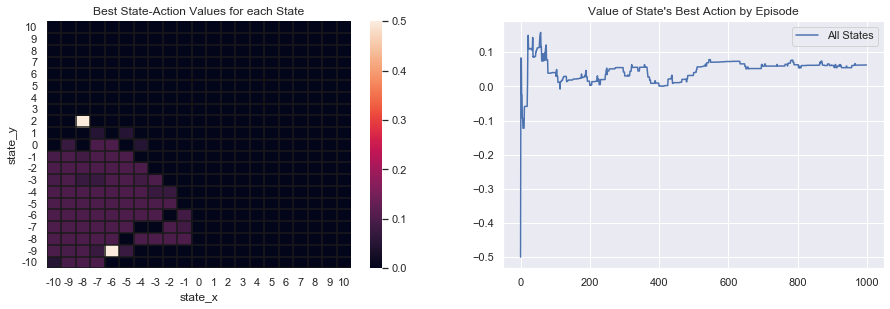

In [21]:
sns.set(rc={'figure.figsize':(15,10)})
pivot = state_action_values[["state_y", "state_x", "Q"]].pivot("state_y", "state_x", "Q")

ax = plt.subplot(221)
ax = sns.heatmap(pivot)
ax.hlines(range(-10,21), *ax.get_xlim())
ax.vlines(range(-10,21), *ax.get_ylim())
ax.set_title("Best State-Action Values for each State")
ax.invert_yaxis()

ax2 = plt.subplot(222)
#ax2.plot(start_state_action_values['episode'], start_state_action_values['Q'], label = "Start State")
ax2.plot(best_actions_table[['episode','Q']].groupby('episode').mean().reset_index()['episode'],
         best_actions_table[['episode','Q']].groupby('episode').mean().reset_index()['Q'],label='All States')
ax2.legend()
ax2.set_title("Value of State's Best Action by Episode")

plt.show()